In [ ]:
import xarray as xr

filename = r"C:\Users\starv\OneDrive\Desktop\Sandy_Cove\NC\202111091500.nc"
n
ds = xr.open_dataset(filename)

print("Variables in this file:")
print(list(ds.variables))

# Optional: show dimensions and attributes too
print(ds)


Variables in this file:
['unit', 'version', 'shots_sum', 'trigger_frequency', 'energy_monitor', 'temp_0', 'temp_1', 'temp_2', 'temp_3', 'temp_4', 'background_average', 'background_stddev', 'number_channels', 'bin_time', 'range_calibration', 'number_data_bins', 'scan_scenario_flags', 'num_background_bins', 'azimuth_angle', 'elevation_angle', 'compass_degrees', 'polarization_voltage_0', 'polarization_voltage_1', 'gps_latitude', 'gps_longitude', 'gps_altitude', 'ad_data_bad_flag', 'data_file_version', 'background_average_2', 'background_stddev_2', 'mcs_mode', 'first_data_bin', 'system_type', 'sync_pulses_seen_per_second', 'first_background_bin', 'ws_used', 'ws_inside_temp', 'ws_outside_temp', 'ws_inside_humidity', 'ws_outside_humidity', 'ws_dewpoint', 'ws_wind_speed', 'ws_wind_direction', 'ws_barometric_pressure', 'ws_rain_rate', 'channel_1', 'channel_2', 'time_utc', 'time', 'c', 'nrb_copol', 'nrb_crosspol']
<xarray.Dataset> Size: 1MB
Dimensions:                      (profile: 60, range: 

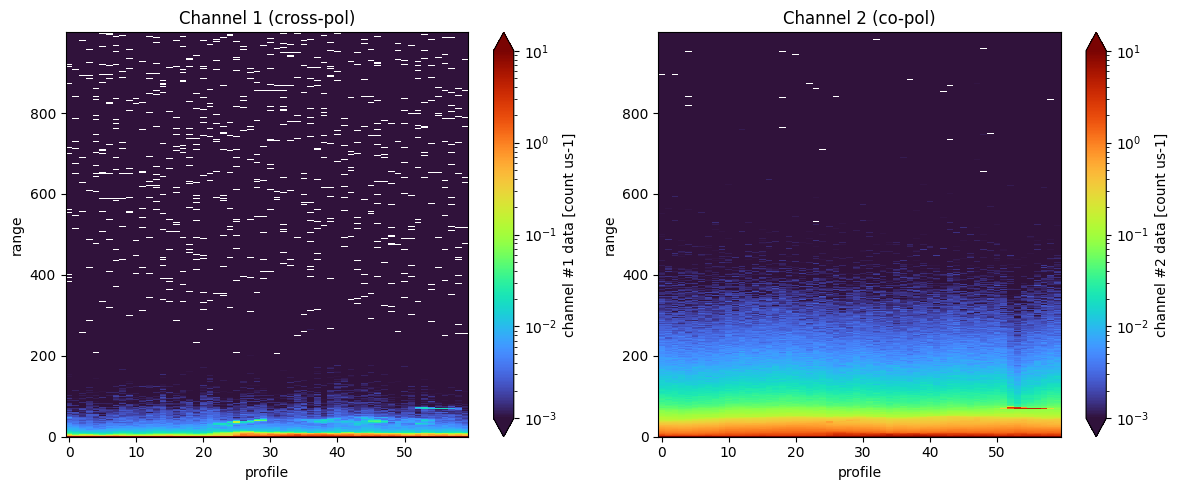

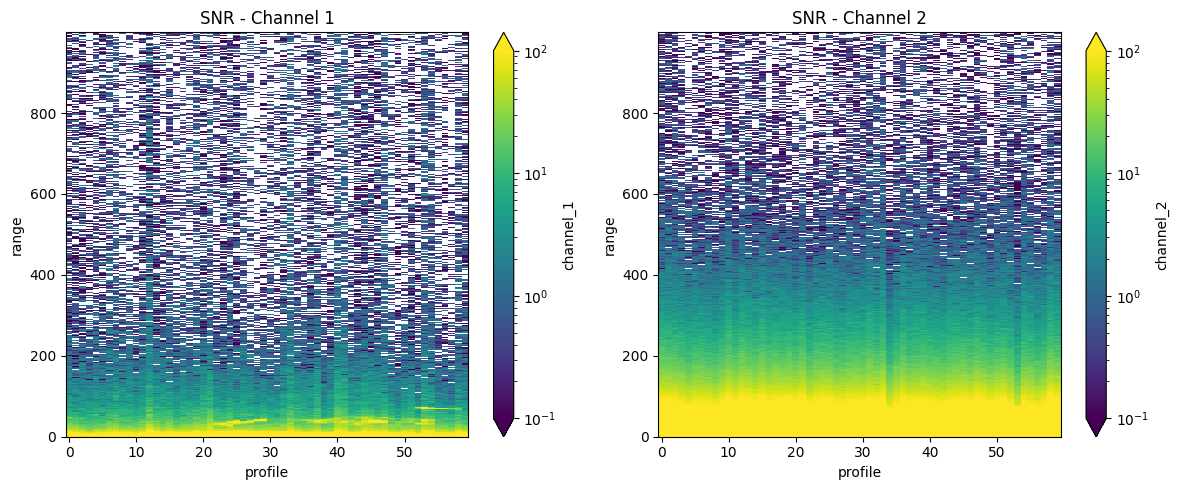

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Open your file
filename = r"C:\Users\starv\OneDrive\Desktop\Sandy_Cove\NC\202111091500.nc"
ds = xr.open_dataset(filename)

# Extract variables
ch1 = ds['channel_1']
ch2 = ds['channel_2']

# Make quick plots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ch1.plot(x='profile', y='range',norm=LogNorm(vmin=1e-3, vmax=1e1),  # adjust vmin/vmax to your data range
     cmap='turbo')
plt.title("Channel 1 (cross-pol)")

plt.subplot(1,2,2)
ch2.plot(
    x="profile", y="range",
    norm=LogNorm(vmin=1e-3, vmax=1e1),
    cmap="turbo"
)
plt.title("Channel 2 (co-pol)")

plt.tight_layout()
plt.show()

import numpy as np

# Pick a high-altitude range (e.g. top 10 bins) as background
bg_range = slice(-10, None)  # last 10 bins

def calc_snr(channel):
    # Mean background noise across the last bins (per time step)
    noise = channel.isel(range=bg_range).mean(dim='range')
    # Broadcast noise along range dimension
    noise_expanded = noise.broadcast_like(channel)
    # Compute SNR
    snr = (channel - noise_expanded) / noise_expanded
    return snr

snr1 = calc_snr(ch1)
snr2 = calc_snr(ch2)

# Plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
snr1.plot(
    x="profile", y="range",
    norm=LogNorm(vmin=0.1, vmax=100),
    cmap="viridis"
)
plt.title("SNR - Channel 1")

plt.subplot(1,2,2)
snr2.plot(
    x="profile", y="range",
    norm=LogNorm(vmin=0.1, vmax=100),
    cmap="viridis"
)
plt.title("SNR - Channel 2")

plt.tight_layout()
plt.show()
